In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

### Generating Random Training Data

In [2]:
# Create the initial set of random inputs
import random

number_training_inputs = 1000
tuple_length = 2
training_inputs = []
int_max = 2_147_483_648 * 2

ackermann_data_bounds = [0, 1000]

def produce_random_int_tuples(tuple_length, number_random_tuples, value_bounds):
    random_tuples = []
    for i in range(number_random_tuples):
        random_tuple = []
        for j in range(tuple_length):
           random_value = random.randint(value_bounds[0], value_bounds[1])
           random_tuple.append(random_value)
        random_tuples.append(tuple(random_tuple))
    return random_tuples
    
training_inputs = produce_random_int_tuples(tuple_length=tuple_length, number_random_tuples=number_training_inputs, value_bounds=ackermann_data_bounds)
print(training_inputs)

[(906, 717), (44, 485), (842, 419), (831, 284), (425, 923), (806, 311), (148, 820), (138, 355), (374, 975), (283, 697), (669, 360), (393, 584), (536, 290), (866, 847), (627, 172), (293, 491), (419, 331), (374, 107), (520, 812), (286, 884), (22, 477), (805, 147), (987, 838), (82, 610), (433, 811), (676, 943), (993, 311), (300, 728), (154, 723), (745, 816), (732, 692), (352, 286), (975, 94), (90, 761), (633, 992), (439, 849), (921, 495), (157, 105), (362, 668), (744, 873), (640, 456), (384, 640), (993, 234), (15, 941), (548, 564), (623, 309), (297, 875), (923, 958), (760, 122), (884, 93), (794, 957), (710, 37), (769, 914), (11, 558), (81, 293), (699, 819), (291, 491), (574, 742), (105, 328), (114, 717), (294, 51), (456, 894), (414, 748), (184, 230), (267, 908), (610, 267), (868, 614), (234, 757), (557, 512), (129, 305), (606, 711), (513, 289), (431, 407), (167, 25), (956, 595), (97, 350), (90, 477), (689, 57), (568, 220), (315, 688), (200, 170), (70, 482), (751, 103), (827, 653), (99, 14

##### Ackermann Function and Execution Code

In [3]:
def ackermann(m: int, n: int) -> int:
    r = 0
    x = 0
    
    if m == 0:
        r = n + 1
    elif m > 0 and n == 0:
        r = ackermann(m - 1, 1)
    else:
        x = ackermann(m, n - 1)
        r = ackermann(m - 1, x)
    
    return r

# Execute the ackermann function with the random pair inputs generated
def execute_ackermann(random_inputs):
    inputs_that_return = []
    inputs_that_throw_exceptions = []

    for pair in random_inputs:
        result = None
        m = pair[0]
        n = pair[1]
        try:
            result = ackermann(m, n)
        except:
            result = None
    
        if result is not None:
            inputs_that_return.append(pair)
        else:
            inputs_that_throw_exceptions.append(pair)

    return inputs_that_return, inputs_that_throw_exceptions

In [4]:
# Partition the training data
training_labels = execute_ackermann(random_inputs=training_inputs)
training_inputs_that_return = training_labels[0]
training_inputs_that_throw_exceptions = training_labels[1]
print(len(training_inputs_that_return))
print(len(training_inputs_that_throw_exceptions))

1
999


In [5]:
K = 1

In [6]:
# Cluster the good inputs
return_inputs_clusters = KMeans(n_clusters=K)
return_inputs_clusters.fit(training_inputs_that_return)
centroids_of_return_clusters = return_inputs_clusters.cluster_centers_
print(centroids_of_return_clusters)
print(len(return_inputs_clusters.labels_))

[[  0. 460.]]
1


In [7]:
# Cluster the bad inputs
exception_inputs_clusters = KMeans(n_clusters=K)
exception_inputs_clusters.fit(training_inputs_that_throw_exceptions)
centroids_of_exception_clusters = exception_inputs_clusters.cluster_centers_
print(centroids_of_exception_clusters)
print(len(exception_inputs_clusters.labels_))

[[498.89489489 503.05105105]]
999


### Plotting the Training Inputs that result in Returns

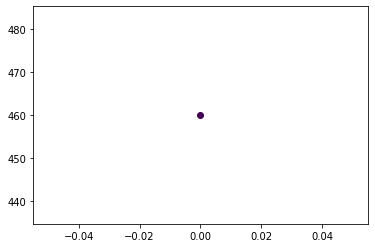

In [8]:
x_values_return = [x for x, y in training_inputs_that_return]
y_values_return = [y for x, y in training_inputs_that_return]
plt.scatter(x_values_return, y_values_return, c=return_inputs_clusters.labels_)

x_values_exception = [x for x, y in training_inputs_that_throw_exceptions]
y_values_exception = [y for x, y in training_inputs_that_throw_exceptions]
# plt.scatter(x_values_exception, y_values_exception, c=exception_inputs_clusters.labels_)

### Test the Return / Exception Classification on new Test Data

In [9]:
# Generate new random triples
test_inputs = produce_random_int_tuples(tuple_length=tuple_length, number_random_tuples=number_training_inputs, value_bounds=ackermann_data_bounds)

print(len(test_inputs))
# Ensure there are no common elements between the training and test data
test_inputs = list(set(test_inputs) - set(training_inputs))
print(len(test_inputs))

# Obtain the ground truth test data
ground_truths = execute_ackermann(test_inputs)
ground_truth_returns = ground_truths[0]
ground_truth_exceptions = ground_truths[1]
print(ground_truth_returns)

1000
997
[(1, 434), (0, 1000), (0, 432), (0, 780), (2, 671), (1, 832), (0, 435)]


In [10]:
# For each test input, infer which cluster it belongs to in both the set of 'return' and 'exception' clusters
preds_from_return_clusters = return_inputs_clusters.predict(test_inputs)
preds_from_exception_clusters = exception_inputs_clusters.predict(test_inputs)

In [11]:
from scipy.spatial import distance

test_inputs_inferred_as_returning = []
test_inputs_inferred_as_throwing_exceptions = []

for m in range(len(test_inputs)):
    test_input = test_inputs[m]

    # Get the respective predictions
    return_cluster_prediction = preds_from_return_clusters[m]
    exception_cluster_prediction = preds_from_exception_clusters[m]

    # Get the centroid of the cluster that each prediction belongs to
    return_cluster_centroid = centroids_of_return_clusters[return_cluster_prediction]
    exception_cluster_centroid = centroids_of_exception_clusters[exception_cluster_prediction]

    # Get the distance of the test_input from the predicted return and exception cluster
    distance_to_return_cluster_centroid = distance.euclidean(return_cluster_centroid, test_input)
    distance_to_exception_cluster_centroid = distance.euclidean(exception_cluster_centroid, test_input)
    
    # Choose the min and add to return or exception - inducing list
    if distance_to_return_cluster_centroid < distance_to_exception_cluster_centroid:
        test_inputs_inferred_as_returning.append(test_input)
    else:
        test_inputs_inferred_as_throwing_exceptions.append(test_input)
    
print(test_inputs_inferred_as_returning)
print(test_inputs_inferred_as_throwing_exceptions)

[(266, 277), (154, 728), (203, 175), (130, 209), (167, 267), (81, 334), (117, 28), (224, 270), (142, 475), (36, 57), (99, 122), (191, 205), (112, 735), (120, 181), (153, 834), (86, 417), (245, 190), (32, 55), (34, 501), (133, 394), (115, 596), (72, 365), (52, 908), (60, 921), (94, 267), (117, 9), (219, 47), (227, 387), (106, 753), (77, 875), (41, 144), (152, 743), (119, 575), (24, 185), (21, 534), (80, 354), (19, 335), (241, 555), (230, 564), (241, 573), (35, 953), (178, 117), (88, 318), (154, 25), (24, 333), (8, 65), (1, 434), (40, 780), (0, 1000), (40, 807), (196, 893), (226, 27), (91, 876), (163, 761), (165, 941), (194, 330), (23, 210), (224, 438), (217, 426), (145, 586), (46, 329), (24, 152), (20, 447), (10, 662), (82, 776), (67, 882), (72, 969), (223, 473), (44, 102), (271, 168), (99, 312), (166, 640), (228, 462), (61, 959), (74, 916), (42, 973), (112, 543), (101, 613), (232, 50), (43, 775), (57, 301), (0, 432), (96, 140), (44, 856), (134, 530), (31, 419), (151, 344), (176, 276), 

In [12]:
print(len(test_inputs_inferred_as_returning))
print(len(test_inputs_inferred_as_throwing_exceptions))

231
766


### Accuracy Assessment for the Return / Exception Predictions

In [13]:
test_inputs_inferred_as_returning = set(test_inputs_inferred_as_returning)
ground_truth_returns = set(ground_truth_returns)

intersection_return_inferences_and_return_ground_truths = test_inputs_inferred_as_returning.intersection(ground_truth_returns)
accuracy_return_inference = (len(intersection_return_inferences_and_return_ground_truths) / len(test_inputs_inferred_as_returning)) * 100
print(accuracy_return_inference)

3.0303030303030303


In [14]:
test_inputs_inferred_as_throwing_exceptions = set(test_inputs_inferred_as_throwing_exceptions)
ground_truth_exceptions = set(ground_truth_exceptions)

intersection_exception_inferences_and_exception_ground_truths = test_inputs_inferred_as_throwing_exceptions.intersection(ground_truth_exceptions)
accuracy_exception_inference = (len(intersection_exception_inferences_and_exception_ground_truths) / len(test_inputs_inferred_as_throwing_exceptions)) * 100
print(accuracy_exception_inference)

100.0
